In [1]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


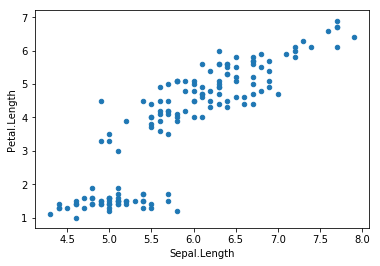

In [3]:
df.plot.scatter(x='Sepal.Length', y='Petal.Length')
plt.show()

In [4]:
labels, uniques = pd.factorize(df['Species'])
labels, uniques

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

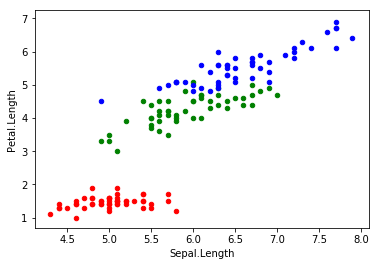

In [5]:
ax = None
for i, c in zip(uniques.values, 'rgb'):
    ax = df[df['Species'] == i].plot.scatter(x='Sepal.Length', y='Petal.Length', c=c, ax=ax)
plt.show()

In [6]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

x = df[['Sepal.Length', 'Petal.Length']].as_matrix()
y = df[['Species']].as_matrix()

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
tree.fit(x, y)

z = tree.predict(x)

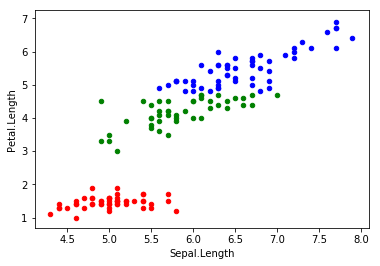

In [7]:
ax = None
for i, c in zip(uniques.values, 'rgb'):
    ax = df[z == i].plot.scatter(x='Sepal.Length', y='Petal.Length', c=c, ax=ax)

plt.show()

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
                feature_names=['sepal length', 'petal length'],
                class_names=uniques.values,
                out_file='tree.dot')

# $ dot -Tpng tree.dot -o tree.png

In [9]:
# Feature와 Depth 늘리기

x = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].as_matrix()
y = df[['Species']].as_matrix()

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
tree.fit(x, y)

z = tree.predict(x)

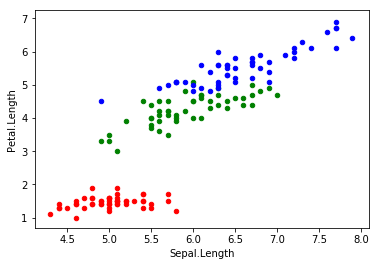

In [10]:
ax = None
for i, c in zip(uniques.values, 'rgb'):
    ax = df[z == i].plot.scatter(x='Sepal.Length', y='Petal.Length', c=c, ax=ax)

plt.show()

export_graphviz(tree,
                feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
                class_names=uniques.values,
                out_file='tree.dot')

In [11]:
# SVM

from sklearn.svm import SVC

x = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].as_matrix()
y = labels

svc = SVC(kernel='linear', C=1.0, random_state=0)
svc.fit(x, y)

z = svc.predict(x)

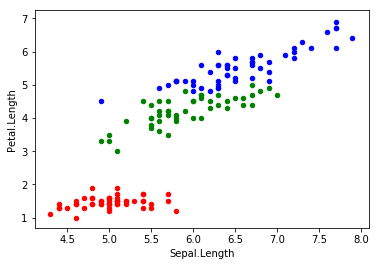

In [12]:
ax = None
for i in range(3):
    ax = df[z == i].plot.scatter(x='Sepal.Length', y='Petal.Length', c='rgb'[i], ax=ax)

plt.show()

export_graphviz(tree,
                feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
                class_names=uniques.values,
                out_file='tree.dot')

In [13]:
svc.support_vectors_

array([[ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 6.3,  2.5,  4.9,  1.5],
       [ 6.8,  2.8,  4.8,  1.4],
       [ 6.7,  3. ,  5. ,  1.7],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 6.3,  2.7,  4.9,  1.8],
       [ 6.2,  2.8,  4.8,  1.8],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 7.2,  3. ,  5.8,  1.6],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 6. ,  3. ,  4.8,  1.8],
       [ 6.3,  2.5,  5. ,  1.9],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 5.9,  3. ,  5.1,  1.8]])